In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pykrx import stock
import seaborn as sns

In [11]:
kospi_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="KOSPI")})
kospi_list['종목명'] = kospi_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

kosdaq_list = pd.DataFrame({'종목코드':stock.get_market_ticker_list(market="KOSDAQ")})
kosdaq_list['종목명'] = kosdaq_list['종목코드'].map(lambda x: stock.get_market_ticker_name(x))

In [16]:
kosdaq_list.shape, kospi_list.shape
kospi_list.head(3)

,종목코드,종목명
0,095570,AJ네트웍스
1,006840,AK홀딩스
2,027410,BGF


In [37]:
kospi_big = (stock.get_market_cap_by_ticker('20211108', market='KOSPI').sort_values('시가총액', ascending=False)[:100]).reset_index()
kosdaq_big = (stock.get_market_cap_by_ticker('20211108', market='KOSDAQ').sort_values('시가총액', ascending=False)[:100]).reset_index()

com_kospi = kospi_list[kospi_list['종목코드'].isin(kospi_big['티커'].values)].reset_index()
com_kosdaq = kosdaq_list[kosdaq_list['종목코드'].isin(kosdaq_big['티커'].values)].reset_index()

In [47]:
df_kospi = pd.merge(kospi_big, com_kospi, how='inner', left_on='티커', right_on='종목코드').loc[:,('티커', '종목명', '시가총액', '거래량', '거래대금')]
df_kosdaq = pd.merge(kosdaq_big, com_kosdaq, how='inner', left_on='티커', right_on='종목코드').loc[:,('티커', '종목명', '시가총액', '거래량', '거래대금')]

In [89]:
com = pd.concat([com_kospi, com_kosdaq])

In [138]:
name = '삼성전기'
tic = com[com['종목명']==name]['종목코드'].values[0]
close = stock.get_market_ohlcv_by_date(fromdate='20210501', todate='20211116', ticker=tic, freq='d')
amount = stock.get_market_ohlcv_by_date(fromdate='20210501', todate='20211116', ticker=tic, freq='d')['거래량']
volume = stock.get_market_trading_volume_by_date(fromdate='20210501', todate='20211116', ticker=tic)

close['ma20'] = close['종가'].rolling(window=20).mean() # 20일 이동평균
close['stddev'] = close['종가'].rolling(window=20).std() # 20일 이동표준편차
close['upper'] = close['ma20'] + 2*close['stddev'] # 상단밴드
close['lower'] = close['ma20'] - 2*close['stddev'] # 하단밴드
close_df = close.loc[:, ['종가', 'ma20', 'upper', 'lower']]

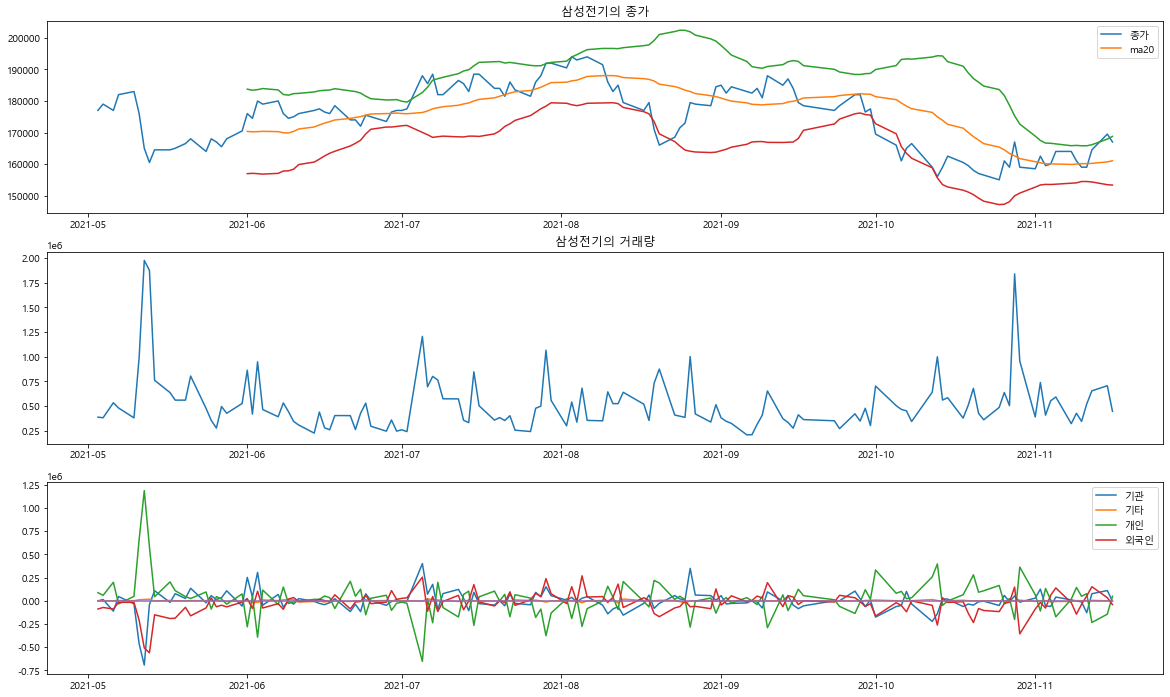

In [145]:
plt.figure(figsize=(20,12))

plt.subplot(311)
plt.plot(close_df)
plt.title(f"{name}의 종가")
plt.legend(['종가', 'ma20'])

plt.subplot(312)
plt.plot(amount)
plt.title(f"{name}의 거래량")

plt.subplot(313)
plt.plot(volume)
plt.legend(['기관', '기타', '개인', '외국인'])

plt.show()